## NBA GM Draft Picks Analysis - Part 2: 2022-2024 Draft Picks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [ ]:
draft_df = pd.read_csv('../outputs/draft_pick_win_shares_2022-2024.csv')

If downloading from GitHub, can use relative url paths: pd.read_csv('draft pick win shares 2022-2024.csv')

In [4]:
# Define a function to compute Combined Win Shares based on the 'Season' value
def compute_combined_win_shares(row):
    if row['Season'] == 2022:
        return row['Year 3_AVG']
    elif row['Season'] == 2023:
        return row['Year 2_AVG']
    elif row['Season'] == 2024:
        return row['Acquired Player Win Shares Year 1']
    else:
        return None  # In case there's no match for Season

# Apply the function to create the 'Combined Win Shares' column
draft_df['Combined Win Shares'] = draft_df.apply(compute_combined_win_shares, axis=1)

In [5]:
# Define a function to compute Combined Expected Win Shares based on the 'Season' value
def compute_combined_expected_win_shares(row):
    if row['Season'] == 2022:
        return row['Third_AVG']
    elif row['Season'] == 2023:
        return row['Sophomore_AVG']
    elif row['Season'] == 2024:
        return row['Rookie_WS']
    else:
        return None  # In case there's no match for Season

# Apply the function to create the 'Combined Expected Win Shares' column
draft_df['Combined Expected Win Shares'] = draft_df.apply(compute_combined_expected_win_shares, axis=1)

The first function above dictates which column a player in my dataset is to be judged on. Rookies will be judged on their year 1 win shares, sophomores will be judged on the average of their win shares over the first two years, and third years will be judged on the average of their win shares over the first three years.

The second function dictates what expected value to compare the value from the first function to. Rookies will be compared to expected win shares for their draft slot for their rookie year, sophomores will be compared to expected average win shares over the first two years, and so on.

In [6]:
draft_df['Pct Change'] = (draft_df['Combined Win Shares'] / draft_df['Combined Expected Win Shares']) - 1

Percent Change column will determine how well a player outperformed or underperformed relative to expectation of their draft slot.

In [12]:
draft_df.columns

Index(['Season', 'Team Acquiring', 'Acquired Player', 'Draft Pick',
       'Acquisition Type', 'Acquiring GM', 'Year 2', 'Year 3', 'Helper',
       'Acquired Player Win Shares Year 1',
       'Acquired Player Win Shares Year 2',
       'Acquired Player Win Shares Year 3', 'Pk', 'Rookie_WS', 'Sophomore_WS',
       'Third_WS', 'Sophomore_AVG', 'Third_AVG', 'Year 2_AVG', 'Year 3_AVG',
       'Combined Win Shares', 'Combined Expected Win Shares', 'Pct Change'],
      dtype='object')

In [16]:
draft_df[draft_df['Acquired Player'] == 'Victor Wembanyama']

,Season,Team Acquiring,Acquired Player,Draft Pick,Acquisition Type,Acquiring GM,Year 2,Year 3,Helper,Acquired Player Win Shares Year 1,Acquired Player Win Shares Year 2,Acquired Player Win Shares Year 3,Pk,Rookie_WS,Sophomore_WS,Third_WS,Sophomore_AVG,Third_AVG,Year 2_AVG,Year 3_AVG,Combined Win Shares,Combined Expected Win Shares,Pct Change
118,2024,SAS,Victor Wembanyama,1,Draft Pick,Brian Wright,2025,2026,2024Victor Wembanyama,3.7,0.0,0.0,1,1.454655,2.77545,3.215094,2.115052,2.481733,1.85,1.233333,3.7,1.454655,1.543559


### Aggregation and Visualization

In [7]:
# Group by 'Acquiring GM' and 'Team Acquiring', then calculate the sum and count
grouped = draft_df.groupby(['Acquiring GM', 'Team Acquiring']).agg({
    'Combined Win Shares': 'sum',
    'Combined Expected Win Shares': 'sum',
    'Acquiring GM': 'count',
    'Draft Pick': 'mean'
})

# Rename the count column for clarity
grouped = grouped.rename(columns={'Acquiring GM': 'Count', 'Draft Pick': 'Average Draft Pick'})

grouped['GM_Pct Change'] = (grouped['Combined Win Shares'] / grouped['Combined Expected Win Shares']) - 1

# Reset index for easier plotting
grouped = grouped.reset_index()

In [19]:
draft_df[draft_df['Acquiring GM'] == 'Jon Horst']

,Season,Team Acquiring,Acquired Player,Draft Pick,Acquisition Type,Acquiring GM,Year 2,Year 3,Helper,Acquired Player Win Shares Year 1,Acquired Player Win Shares Year 2,Acquired Player Win Shares Year 3,Pk,Rookie_WS,Sophomore_WS,Third_WS,Sophomore_AVG,Third_AVG,Year 2_AVG,Year 3_AVG,Combined Win Shares,Combined Expected Win Shares,Pct Change
53,2022,MIL,Sandro Mamukelashvili,54,Draft Pick,Jon Horst,2023,2024,2022Sandro Mamukelashvili,1.1,0.2,0.0,54,0.110512,0.229040,0.371228,0.169776,0.236926,0.65,0.433333,0.433333,0.236926,0.828978
59,2022,MIL,Georgios Kalaitzakis,60,Draft Pick,Jon Horst,2023,2024,2022Georgios Kalaitzakis,0.0,0.0,0.0,60,-0.041655,-0.059233,0.049281,-0.050444,-0.017203,0.00,0.000000,0.000000,-0.017203,-1.000000
83,2023,MIL,MarJon Beauchamp,24,Draft Pick,Jon Horst,2024,2025,2023MarJon Beauchamp,0.4,0.7,0.0,24,0.871347,1.670404,1.980964,1.270876,1.507572,0.55,0.366667,0.550000,1.270876,-0.567228
153,2024,MIL,Andre Jackson Jr.,36,Draft Pick,Jon Horst,2025,2026,2024Andre Jackson Jr.,1.0,0.0,0.0,36,0.567013,1.093858,1.337069,0.830436,0.999314,0.50,0.333333,1.000000,0.567013,0.763627
175,2024,MIL,Chris Livingston,58,Draft Pick,Jon Horst,2025,2026,2024Chris Livingston,0.1,0.0,0.0,58,0.009067,0.036858,0.156597,0.022962,0.067507,0.05,0.033333,0.100000,0.009067,10.028811


In [20]:
grouped[grouped['Acquiring GM'] == 'Jon Horst']

,Acquiring GM,Team Acquiring,Combined Win Shares,Combined Expected Win Shares,Count,Average Draft Pick,GM_Pct Change
11,Jon Horst,MIL,2.083333,2.06668,5,46.4,0.008058


In [21]:
grouped

,Acquiring GM,Team Acquiring,Combined Win Shares,Combined Expected Win Shares,Count,Average Draft Pick,GM_Pct Change
0,Andy Elisburg,MIA,5.050000,2.184280,2,22.500000,1.311974
1,Anthony Parker,ORL,1.600000,2.528892,2,8.500000,-0.367312
2,Bob Myers,GSW,5.000000,4.158724,2,10.500000,0.202292
3,Bobby Webster,TOR,6.716667,5.554710,5,28.600000,0.209184
4,Brad Stevens,BOS,0.350000,1.340890,3,45.333333,-0.738979
5,Brian Wright,SAS,4.250000,9.561003,8,24.000000,-0.555486
6,Calvin Booth,DEN,5.350000,5.140697,5,28.600000,0.040715
7,Chad Buchanan,IND,7.266667,9.775563,10,29.900000,-0.256650
8,Daryl Morey,PHI,0.466667,2.023779,3,43.666667,-0.769408
9,Joe Cronin,POR,3.066667,7.973760,9,31.666667,-0.615405


In [8]:
import matplotlib.image as mpimg
from PIL import Image

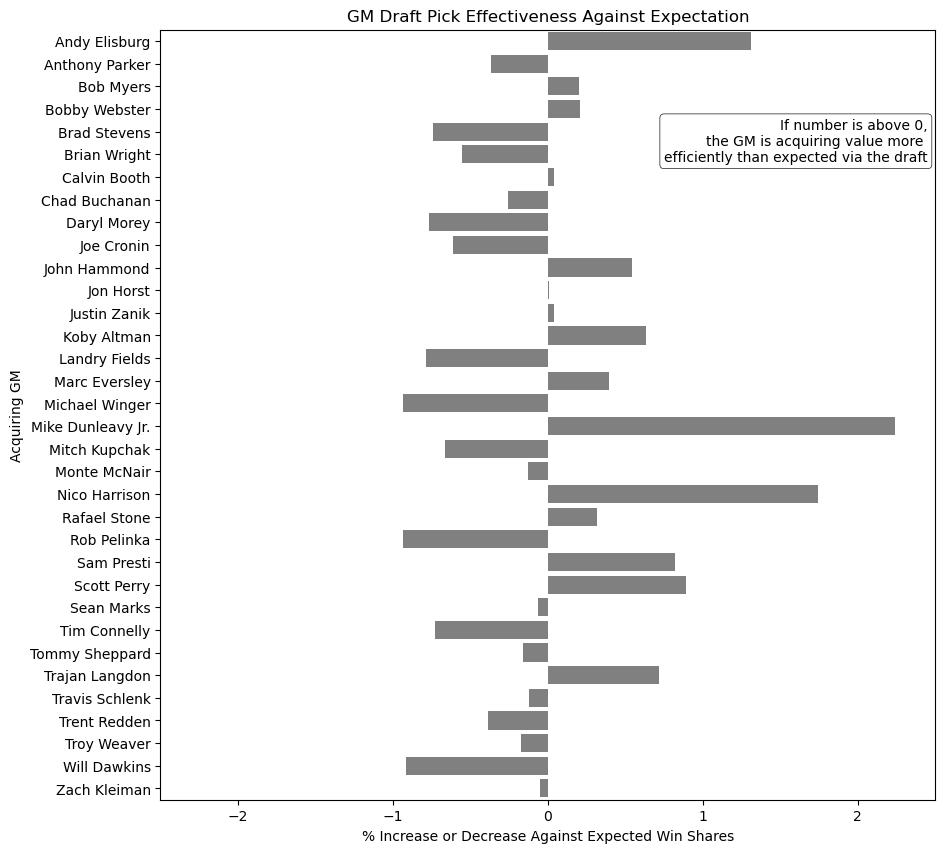

In [13]:
# Set up the plot size with reduced height
plt.figure(figsize=(10, 10))  # Adjust the height here

# Create a horizontal bar chart using seaborn
sns.barplot(y='Acquiring GM', x='GM_Pct Change', data=grouped, color='gray')

# Add labels and title
plt.title('GM Draft Pick Effectiveness Against Expectation')
plt.xlabel('% Increase or Decrease Against Expected Win Shares')
plt.ylabel('Acquiring GM')

# Set the x-axis limits to show only positive values
plt.xlim(-2.5, 2.5)  # Lower limit is set to 0, upper limit remains unchanged


# Add an annotation with a multi-line text box aligned to the far right
plt.text(
    x=plt.xlim()[1] * 0.98,  # Position near the far right of the x-axis
    y=len(grouped) * 0.1,  # Adjusted vertical position
    s="If number is above 0,\nthe GM is acquiring value more \nefficiently than expected via the draft",
    ha='right',  # Align text to the right
    va='top',  # Vertical alignment to the top
    color='black',
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", linewidth=0.5, alpha=0.9),
)


# Align y-axis labels with bars by setting the ticks and labels manually
plt.yticks(ticks=range(len(grouped)), labels=grouped['Acquiring GM'], rotation=0)

# Show the plot
plt.show()

C:\Users\kevin\AppData\Local\Temp\ipykernel_22236\676026085.py:36: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = Image.open(logo_path).resize((40, 40), Image.ANTIALIAS)


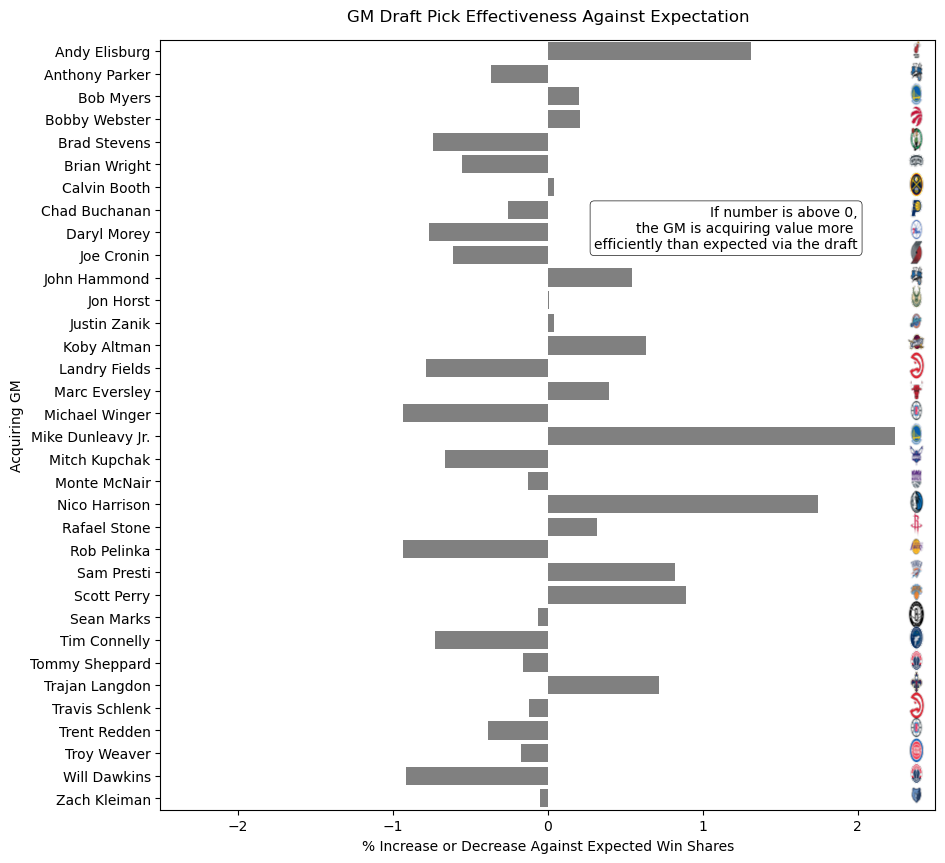

In [ ]:
# Set up the plot size
plt.figure(figsize=(10, 10))

# Create a horizontal bar chart using seaborn with explicit ordering
sns.barplot(
    y='Acquiring GM', x='GM_Pct Change', data=grouped,
    color='gray', order=grouped['Acquiring GM']
)

# Add labels and title
plt.title('GM Draft Pick Effectiveness Against Expectation')
plt.xlabel('% Increase or Decrease Against Expected Win Shares')
plt.ylabel('Acquiring GM')

# Set the x-axis limits
plt.xlim(-2.5, 2.5)

# Get the current axis
ax = plt.gca()

# Add team logos to the far right of the table, aligned with the bars
y_positions = [p.get_y() + p.get_height() / 2 for p in ax.patches]  # Get vertical positions of bars

# Reverse y_positions to match the reversed order of `Acquiring GM`
y_positions = y_positions[::-1]

# Adjust the logo placement (slightly lower)
logo_offset = -0.25  # Lower each logo by 0.02 units

for y_pos, (index, row) in zip(y_positions, grouped.iterrows()):
    gm_name = row['Acquiring GM']
    team_name = row['Team Acquiring']
    
    # Load and resize the logo image
    logo_path = f'../logos_4/{team_name}.png'  # Update with actual path to logos
    img = Image.open(logo_path).resize((40, 40), Image.ANTIALIAS)

    # Adjust position by applying the offset
    inset_ax = ax.inset_axes([0.95, (y_pos + logo_offset) / len(grouped), 0.05, 0.05])  # Adjust position and size
    inset_ax.imshow(img)
    inset_ax.axis('off')  # Hide axes for the image

# Add an annotation with a multi-line text box aligned to the far right
plt.text(
    x=plt.xlim()[1] * 0.8,
    y=len(grouped) * 0.2,
    s="If number is above 0,\nthe GM is acquiring value more \nefficiently than expected via the draft",
    ha='right', va='top',
    color='black', fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", linewidth=0.5, alpha=0.9)
)

# Show the plot
plt.show()

Wrote code below to grade GMs based on the percent change column and then created a z score as well to be able to aggregate in the holistic GM performance analysis.

In [28]:
# Define the grade categories
grade_labels = ['F', 'D', 'C', 'B', 'A']

# Calculate the quantiles for the 'final_ratio' column (5 bins for grades A to F)
grouped['Grade'] = pd.qcut(grouped['GM_Pct Change'], q=5, labels=grade_labels)

In [32]:
# Calculate the mean and standard deviation of the 'GM_Pct Change' column
mean_gm_pct_change = grouped['GM_Pct Change'].mean()
std_gm_pct_change = grouped['GM_Pct Change'].std()

# Create the 'z score' column by applying the Z-score formula
grouped['z score'] = (grouped['GM_Pct Change'] - mean_gm_pct_change) / std_gm_pct_change

In [33]:
grouped.sort_values('GM_Pct Change', ascending=False)

,Acquiring GM,Team Acquiring,Combined Win Shares,Combined Expected Win Shares,Count,Average Draft Pick,GM_Pct Change,Grade,z score
17,Mike Dunleavy Jr.,GSW,9.150000,2.826526,5,40.600000,2.237190,A,2.903440
20,Nico Harrison,DAL,5.400000,1.969414,2,24.500000,1.741932,A,2.254271
0,Andy Elisburg,MIA,5.050000,2.184280,2,22.500000,1.311974,A,1.690695
24,Scott Perry,NYK,5.933333,3.142253,4,40.250000,0.888242,A,1.135278
23,Sam Presti,OKC,24.183333,13.274851,10,23.000000,0.821740,A,1.048110
28,Trajan Langdon,NOP,13.400000,7.802937,7,28.714286,0.717302,A,0.911216
13,Koby Altman,CLE,6.200000,3.804328,5,39.200000,0.629723,A,0.796419
10,John Hammond,ORL,11.716667,7.589864,4,11.500000,0.543725,B,0.683697
15,Marc Eversley,CHI,4.183333,2.998074,3,30.333333,0.395340,B,0.489198
21,Rafael Stone,HOU,18.916667,14.351454,9,15.333333,0.318101,B,0.387955


In [ ]:
grouped.to_csv('../outputs/draft_pick_GM_z_scores_2022-2024.csv', index=False)

In [ ]:
grouped = pd.read_csv('../outputs/draft_pick_GM_z_scores_2022-2024.csv')

### Trying to find patterns and correlations

In [30]:
grouped['Count'].corr(grouped['GM_Pct Change'])

-0.05388702379664998

In [31]:
grouped['Average Draft Pick'].corr(grouped['GM_Pct Change'])

-0.17335110319910557

A weak correlation means that average draft pick does not have a strong influence on GM draft effectiveness (GM_Pct Change). In other words, the GM's ability to acquire value above or below expectations (as measured by the GM_Pct Change) isn't heavily tied to the draft position on average. The negative correlation means that as the draft pick number increases, the likelier the GM will fail to meet expectation with the pick, which shows the difficulty in finding good players through the draft.